In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd

In [7]:
data1 = pd.read_csv('power-laws-forecasting-energy-consumption-weather.csv',sep=';')

In [8]:
data1

Timestamp  Temperature   Distance  SiteId
0        2017-03-03T19:00:00+00:00         10.6  27.489346      51
1        2017-03-03T19:20:00+00:00         11.0  28.663082      51
2        2017-03-03T20:00:00+00:00          6.3  28.307039      51
3        2017-03-03T21:55:00+00:00         10.0  29.797449      51
4        2017-03-03T23:00:00+00:00          5.4  28.307039      51
...                            ...          ...        ...     ...
3957030  2016-09-11T11:00:00+00:00         25.9  28.307039      51
3957031  2016-09-11T11:20:00+00:00         27.0  27.489346      51
3957032  2016-09-11T12:00:00+00:00         27.1  28.307039      51
3957033  2016-09-11T15:50:00+00:00         28.0  27.489346      51
3957034  2016-09-11T18:00:00+00:00         29.6  29.797449      51

[3957035 rows x 4 columns]

In [9]:
filtered_data = data1.query('SiteId==6')

In [10]:
filtered_data

Timestamp  Temperature  Distance  SiteId
332021   2013-01-01T20:00:00+00:00         20.0  8.700186       6
332022   2013-01-02T02:00:00+00:00         15.0  8.700186       6
332023   2013-01-02T09:00:00+00:00         20.0  8.700186       6
332024   2013-01-02T10:00:00+00:00         20.6  7.611766       6
332025   2013-01-03T07:00:00+00:00         16.0  8.700186       6
...                            ...          ...       ...     ...
3533453  2015-02-08T20:30:00+00:00         19.0  8.700186       6
3533454  2015-02-08T21:00:00+00:00         18.0  8.700186       6
3533455  2015-02-08T23:30:00+00:00         18.0  8.700186       6
3533456  2015-02-09T16:00:00+00:00         23.3  7.611766       6
3533457  2015-02-10T07:30:00+00:00         18.0  8.700186       6

[95787 rows x 4 columns]

In [11]:
filtered_data.to_csv('df2.csv')

In [12]:
filtered_data1=filtered_data.query('Distance == 8.70018578387576')


In [13]:
filtered_data1

Empty DataFrame
Columns: [Timestamp, Temperature, Distance, SiteId]
Index: []

In [232]:
weather = pd.read_csv("power-laws-forecasting-energy-consumption-weather.csv", sep=";", parse_dates=['Timestamp'])
consumption =pd.read_csv("power-laws-forecasting-energy-consumption-training-data.csv", sep=";", parse_dates=['Timestamp'])

site_id = 6

weather_on_site = weather.query(f"SiteId == {site_id}")
weather_on_site = weather_on_site.sort_values("Timestamp")

consumption_on_site = consumption[consumption["SiteId"] == site_id]
consumption_on_site = consumption_on_site.sort_values("Timestamp")

weather_on_site.to_csv(f"site_{site_id}_weather.csv", sep=";", index=False)
consumption_on_site.to_csv(f"site_{site_id}_consumption.csv", sep=";", index=False)

In [233]:

import datetime

site_id = 6

weather = pd.read_csv(f"site_{site_id}_weather.csv", sep=";", parse_dates=['Timestamp'])
consumption = pd.read_csv(f"site_{site_id}_consumption.csv", sep=";", parse_dates=['Timestamp'])

def datetime_to_epoch(d1):
    """
    January 1st, 1970 at 00:00:00 UTC is referred to as the Unix epoch
    :param d1: input date
    :return: seconds since unix epoch
    """
    if not d1.tzinfo:
        raise ValueError("date is missing timezone information")

    d2 = datetime.datetime(1970, 1, 1, tzinfo=datetime.timezone.utc)
    time_delta = d1 - d2
    ts = int(time_delta.total_seconds())
    return ts

def to_unix_epoch(row):
    return datetime_to_epoch(row["Timestamp"])

weather = weather[weather["Distance"] < 8]

weather["UnixTS"] = weather.apply(to_unix_epoch, axis=1)
consumption["UnixTS"] = consumption.apply(to_unix_epoch, axis=1)

def find_closest_temperature_at_ts(row):
    timestamp = row["UnixTS"]
    loc = weather["UnixTS"].searchsorted(timestamp)
    if loc < len(weather)-1:
        c0 = weather.iloc[ loc ]
        c1 = weather.iloc[ loc+1 ]
        distance = c1["UnixTS"] - c0["UnixTS"]
        print("YO... ", distance)
        alpha = (timestamp - c0["UnixTS"]) / distance
        t0 = weather.iloc[loc]["Temperature"]
        t1 = weather.iloc[loc+1]["Temperature"]
        return (1-alpha) * t0 + alpha * t1
    
    return weather.iloc[loc]["Temperature"]

consumption["Temperature"] = consumption.apply(find_closest_temperature_at_ts, axis=1)
print(consumption.head(50))

YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800

In [234]:
print(consumption.head(5))

    obs_id  SiteId                 Timestamp  ForecastId         Value  \
0  1231308       6 2013-01-01 01:00:00+00:00          43  25108.373290   
1  1855136       6 2013-01-01 01:15:00+00:00          43  25062.047878   
2  5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
3  1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
4   167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   

       UnixTS  Temperature  
0  1357002000    18.900000  
1  1357002900    18.958333  
2  1357003800    19.016667  
3  1357004700    19.075000  
4  1357005600    19.133333  


In [237]:
print(consumption.head(20))

     obs_id  SiteId                 Timestamp  ForecastId         Value  \
0   1231308       6 2013-01-01 01:00:00+00:00          43  25108.373290   
1   1855136       6 2013-01-01 01:15:00+00:00          43  25062.047878   
2   5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
3   1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
4    167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
5   1417840       6 2013-01-01 02:15:00+00:00          43  24992.559760   
6   6647355       6 2013-01-01 02:30:00+00:00          43  25062.047878   
7   4908840       6 2013-01-01 02:45:00+00:00          43  25247.349526   
8    269582       6 2013-01-01 03:00:00+00:00          43  25432.651174   
9    645210       6 2013-01-01 03:15:00+00:00          43  25363.163056   
10  2004192       6 2013-01-01 03:30:00+00:00          43  25293.674938   
11  5293734       6 2013-01-01 03:45:00+00:00          43  25085.210584   
12  6297911       6 2013-

In [238]:
consumption.to_csv(f"site_{site_id}_consumption_edit.csv", sep=";", index=False)

In [239]:
consumption_edit = pd.read_csv(f"site_{site_id}_consumption_edit.csv", sep=";", parse_dates=['Timestamp'])

In [240]:
consumption_edit 

obs_id  SiteId                 Timestamp  ForecastId         Value  \
0       1231308       6 2013-01-01 01:00:00+00:00          43  25108.373290   
1       1855136       6 2013-01-01 01:15:00+00:00          43  25062.047878   
2       5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
3       1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
4        167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
...         ...     ...                       ...         ...           ...   
140739  2522602       6 2017-10-23 01:45:00+00:00         188  15935.941719   
140740  7671789       6 2017-10-23 02:00:00+00:00         188  15935.941719   
140741   184978       6 2017-10-23 02:15:00+00:00         188  15565.338424   
140742  1399957       6 2017-10-23 02:30:00+00:00         188  15194.735128   
140743  4821512       6 2017-10-23 02:45:00+00:00         188  15380.036776   

            UnixTS  Temperature  
0       1357002000    18.900000  
1       1357002900    18.958333  
2       1357003800    19.016667  
3       1357004700    19.075000  
4       1357005600    19.133333  
...            ...          ...  
140739  1508723100    12.900000  
140740  1508724000    12.900000  
140741  1508724900    12.900000  
140742  1508725800    12.900000  
140743  1508726700    12.900000  

[140744 rows x 7 columns]

consumption_edit1 = consumption_edit.drop(consumption_edit.columns[[1,3]], axis=1)

In [241]:
consumption_edit1 = consumption_edit.drop(consumption_edit.columns[[0,1,3,5]], axis=1)

In [242]:
consumption_edit1

Timestamp         Value  Temperature
0      2013-01-01 01:00:00+00:00  25108.373290    18.900000
1      2013-01-01 01:15:00+00:00  25062.047878    18.958333
2      2013-01-01 01:30:00+00:00  25015.722466    19.016667
3      2013-01-01 01:45:00+00:00  24969.397055    19.075000
4      2013-01-01 02:00:00+00:00  24923.071643    19.133333
...                          ...           ...          ...
140739 2017-10-23 01:45:00+00:00  15935.941719    12.900000
140740 2017-10-23 02:00:00+00:00  15935.941719    12.900000
140741 2017-10-23 02:15:00+00:00  15565.338424    12.900000
140742 2017-10-23 02:30:00+00:00  15194.735128    12.900000
140743 2017-10-23 02:45:00+00:00  15380.036776    12.900000

[140744 rows x 3 columns]

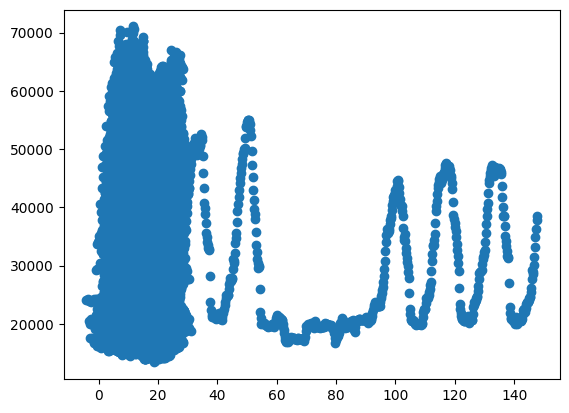

In [243]:
import matplotlib.pyplot as plt

plt.scatter(consumption_edit1.iloc[:,2],consumption_edit1.iloc[:,1])
plt.show()

In [244]:
consumption_edit1.to_csv(f"site_{site_id}_consumption_edit1.csv")

In [245]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [246]:
consumption_edit1["Temperature_C"] = fahr_to_celsius(consumption_edit1["Temperature"])

In [247]:
consumption_edit1

Timestamp         Value  Temperature  Temperature_C
0      2013-01-01 01:00:00+00:00  25108.373290    18.900000      -7.277778
1      2013-01-01 01:15:00+00:00  25062.047878    18.958333      -7.245370
2      2013-01-01 01:30:00+00:00  25015.722466    19.016667      -7.212963
3      2013-01-01 01:45:00+00:00  24969.397055    19.075000      -7.180556
4      2013-01-01 02:00:00+00:00  24923.071643    19.133333      -7.148148
...                          ...           ...          ...            ...
140739 2017-10-23 01:45:00+00:00  15935.941719    12.900000     -10.611111
140740 2017-10-23 02:00:00+00:00  15935.941719    12.900000     -10.611111
140741 2017-10-23 02:15:00+00:00  15565.338424    12.900000     -10.611111
140742 2017-10-23 02:30:00+00:00  15194.735128    12.900000     -10.611111
140743 2017-10-23 02:45:00+00:00  15380.036776    12.900000     -10.611111

[140744 rows x 4 columns]

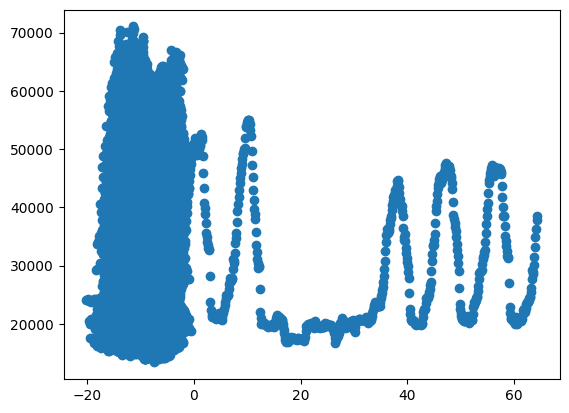

In [248]:
plt.scatter(consumption_edit1.iloc[:,3],consumption_edit1.iloc[:,1])
plt.show()

In [249]:
import pandas
import datetime

site_id = 6

weather = pandas.read_csv(f"site_{site_id}_weather.csv", sep=";", parse_dates=['Timestamp'])
consumption = pandas.read_csv(f"site_{site_id}_consumption.csv", sep=";", parse_dates=['Timestamp'])

def datetime_to_epoch(d1):
    """
    January 1st, 1970 at 00:00:00 UTC is referred to as the Unix epoch
    :param d1: input date
    :return: seconds since unix epoch
    """
    if not d1.tzinfo:
        raise ValueError("date is missing timezone information")

    d2 = datetime.datetime(1970, 1, 1, tzinfo=datetime.timezone.utc)
    time_delta = d1 - d2
    ts = int(time_delta.total_seconds())
    return ts

def to_unix_epoch(row):
    return datetime_to_epoch(row["Timestamp"])

weather = weather[weather["Distance"] < 8]

weather["UnixTS"] = weather.apply(to_unix_epoch, axis=1)
consumption["UnixTS"] = consumption.apply(to_unix_epoch, axis=1)

def convert_to_celisus(f):
    return (f - 32) / 1.8

def find_closest_temperature_at_ts(row):
    timestamp = row["UnixTS"]
    loc = weather["UnixTS"].searchsorted(timestamp)
    
    return weather.iloc[loc]["Temperature"]


    if loc < len(weather)-1:
        c0 = weather.iloc[ loc ]
        c1 = weather.iloc[ loc+1 ]
        distance = c1["UnixTS"] - c0["UnixTS"]
        alpha = (timestamp - c0["UnixTS"]) / distance
        t0 = weather.iloc[loc]["Temperature"]
        t1 = weather.iloc[loc+1]["Temperature"]
        return convert_to_celisus((1-alpha) * t0 + alpha * t1)
    
    return convert_to_celisus(weather.iloc[loc]["Temperature"])

consumption["Temperature"] = consumption.apply(find_closest_temperature_at_ts, axis=1)

weather.to_csv(f"site_{site_id}_weather_post.csv", sep=";", index=False)
consumption.to_csv(f"site_{site_id}_consumption_post.csv", sep=";", index=False)

In [250]:
weather

Timestamp  Temperature  Distance  SiteId      UnixTS
0     2013-01-01 13:00:00+00:00         21.7  7.611766       6  1357045200
4     2013-01-01 16:00:00+00:00         22.4  7.611766       6  1357056000
9     2013-01-01 19:00:00+00:00         20.5  7.611766       6  1357066800
13    2013-01-01 22:00:00+00:00         16.0  7.611766       6  1357077600
17    2013-01-02 01:00:00+00:00         15.0  7.611766       6  1357088400
...                         ...          ...       ...     ...         ...
95756 2017-12-30 22:00:00+00:00         17.8  7.611766       6  1514671200
95764 2017-12-31 01:00:00+00:00         16.2  7.611766       6  1514682000
95771 2017-12-31 04:00:00+00:00         14.9  7.611766       6  1514692800
95777 2017-12-31 07:00:00+00:00         15.4  7.611766       6  1514703600
95785 2017-12-31 10:00:00+00:00         20.4  7.611766       6  1514714400

[14415 rows x 5 columns]

In [251]:
consumption

obs_id  SiteId                 Timestamp  ForecastId         Value  \
0       1231308       6 2013-01-01 01:00:00+00:00          43  25108.373290   
1       1855136       6 2013-01-01 01:15:00+00:00          43  25062.047878   
2       5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
3       1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
4        167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
...         ...     ...                       ...         ...           ...   
140739  2522602       6 2017-10-23 01:45:00+00:00         188  15935.941719   
140740  7671789       6 2017-10-23 02:00:00+00:00         188  15935.941719   
140741   184978       6 2017-10-23 02:15:00+00:00         188  15565.338424   
140742  1399957       6 2017-10-23 02:30:00+00:00         188  15194.735128   
140743  4821512       6 2017-10-23 02:45:00+00:00         188  15380.036776   

            UnixTS  Temperature  
0       1357002000         21.7  
1       1357002900         21.7  
2       1357003800         21.7  
3       1357004700         21.7  
4       1357005600         21.7  
...            ...          ...  
140739  1508723100         12.9  
140740  1508724000         12.9  
140741  1508724900         12.9  
140742  1508725800         12.9  
140743  1508726700         12.9  

[140744 rows x 7 columns]

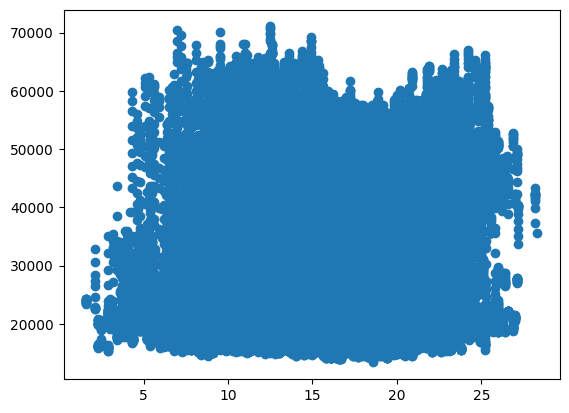

In [252]:
import matplotlib.pyplot as plt

plt.scatter(consumption.iloc[:,6],consumption.iloc[:,4])
plt.show()

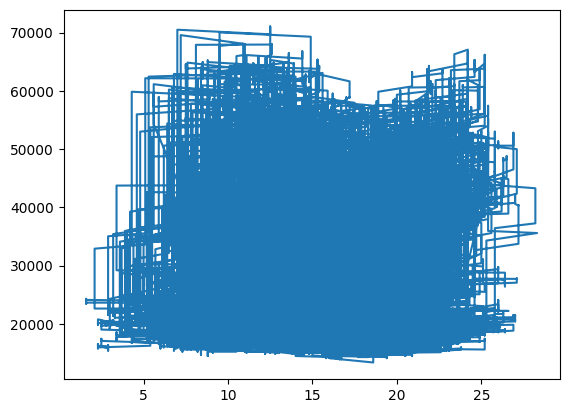

In [253]:
import matplotlib.pyplot as plt

plt.plot(consumption['Temperature'],consumption['Value'])

In [254]:
consumption1

obs_id  SiteId                 Timestamp  ForecastId         Value  \
0       1855136       6 2013-01-01 01:15:00+00:00          43  25062.047878   
1       5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
2       1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
3        167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
4       1417840       6 2013-01-01 02:15:00+00:00          43  24992.559760   
...         ...     ...                       ...         ...           ...   
140738  2522602       6 2017-10-23 01:45:00+00:00         188  15935.941719   
140739  7671789       6 2017-10-23 02:00:00+00:00         188  15935.941719   
140740   184978       6 2017-10-23 02:15:00+00:00         188  15565.338424   
140741  1399957       6 2017-10-23 02:30:00+00:00         188  15194.735128   
140742  4821512       6 2017-10-23 02:45:00+00:00         188  15380.036776   

            UnixTS  Temperature          C(J)        C(J-1)  T(J)  T(J-1)  \
0       1357002900    18.958333  25062.047878  25108.373290  21.7    21.7   
1       1357003800    19.016667  25015.722466  25062.047878  21.7    21.7   
2       1357004700    19.075000  24969.397055  25015.722466  21.7    21.7   
3       1357005600    19.133333  24923.071643  24969.397055  21.7    21.7   
4       1357006500    19.191667  24992.559760  24923.071643  21.7    21.7   
...            ...          ...           ...           ...   ...     ...   
140738  1508723100    12.900000  15935.941719  15935.941719  12.9    12.9   
140739  1508724000    12.900000  15935.941719  15935.941719  12.9    12.9   
140740  1508724900    12.900000  15565.338424  15935.941719  12.9    12.9   
140741  1508725800    12.900000  15194.735128  15565.338424  12.9    12.9   
140742  1508726700    12.900000  15380.036776  15194.735128  12.9    12.9   

        deltaT(J)   deltaC(J)  
0             0.0  -46.325412  
1             0.0  -46.325412  
2             0.0  -46.325412  
3             0.0  -46.325412  
4             0.0   69.488118  
...           ...         ...  
140738        0.0    0.000000  
140739        0.0    0.000000  
140740        0.0 -370.603296  
140741        0.0 -370.603296  
140742        0.0  185.301648  

[140743 rows x 13 columns]

In [255]:
consumption1. tail(-1)

obs_id  SiteId                 Timestamp  ForecastId         Value  \
1       5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
2       1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
3        167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
4       1417840       6 2013-01-01 02:15:00+00:00          43  24992.559760   
5       6647355       6 2013-01-01 02:30:00+00:00          43  25062.047878   
...         ...     ...                       ...         ...           ...   
140738  2522602       6 2017-10-23 01:45:00+00:00         188  15935.941719   
140739  7671789       6 2017-10-23 02:00:00+00:00         188  15935.941719   
140740   184978       6 2017-10-23 02:15:00+00:00         188  15565.338424   
140741  1399957       6 2017-10-23 02:30:00+00:00         188  15194.735128   
140742  4821512       6 2017-10-23 02:45:00+00:00         188  15380.036776   

            UnixTS  Temperature          C(J)        C(J-1)  T(J)  T(J-1)  \
1       1357003800    19.016667  25015.722466  25062.047878  21.7    21.7   
2       1357004700    19.075000  24969.397055  25015.722466  21.7    21.7   
3       1357005600    19.133333  24923.071643  24969.397055  21.7    21.7   
4       1357006500    19.191667  24992.559760  24923.071643  21.7    21.7   
5       1357007400    19.250000  25062.047878  24992.559760  21.7    21.7   
...            ...          ...           ...           ...   ...     ...   
140738  1508723100    12.900000  15935.941719  15935.941719  12.9    12.9   
140739  1508724000    12.900000  15935.941719  15935.941719  12.9    12.9   
140740  1508724900    12.900000  15565.338424  15935.941719  12.9    12.9   
140741  1508725800    12.900000  15194.735128  15565.338424  12.9    12.9   
140742  1508726700    12.900000  15380.036776  15194.735128  12.9    12.9   

        deltaT(J)   deltaC(J)  
1             0.0  -46.325412  
2             0.0  -46.325412  
3             0.0  -46.325412  
4             0.0   69.488118  
5             0.0   69.488118  
...           ...         ...  
140738        0.0    0.000000  
140739        0.0    0.000000  
140740        0.0 -370.603296  
140741        0.0 -370.603296  
140742        0.0  185.301648  

[140742 rows x 13 columns]

0        2013-01-01 01:00:00+00:00
1        2013-01-01 01:15:00+00:00
2        2013-01-01 01:30:00+00:00
3        2013-01-01 01:45:00+00:00
4        2013-01-01 02:00:00+00:00
                    ...           
140739   2017-10-23 01:45:00+00:00
140740   2017-10-23 02:00:00+00:00
140741   2017-10-23 02:15:00+00:00
140742   2017-10-23 02:30:00+00:00
140743   2017-10-23 02:45:00+00:00
Name: Timestamp, Length: 140744, dtype: datetime64[ns, UTC]


C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\3857039619.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.figure().show()


      obs_id  SiteId                 Timestamp  ForecastId         Value  \
1    1855136       6 2013-01-01 01:15:00+00:00          43  25062.047878   
2    5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
3    1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
4     167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
5    1417840       6 2013-01-01 02:15:00+00:00          43  24992.559760   
..       ...     ...                       ...         ...           ...   
96   4414228       6 2013-01-02 01:00:00+00:00          43  25201.024114   
97   7679920       6 2013-01-02 01:15:00+00:00          43  24946.234349   
98   3636173       6 2013-01-02 01:30:00+00:00          43  24691.444583   
99   2507416       6 2013-01-02 01:45:00+00:00          43  24784.095407   
100  4975213       6 2013-01-02 02:00:00+00:00          43  24876.746231   

         UnixTS  Temperature          C(J)        C(J-1)  T(J)  T(J-1)  \
1    13570029

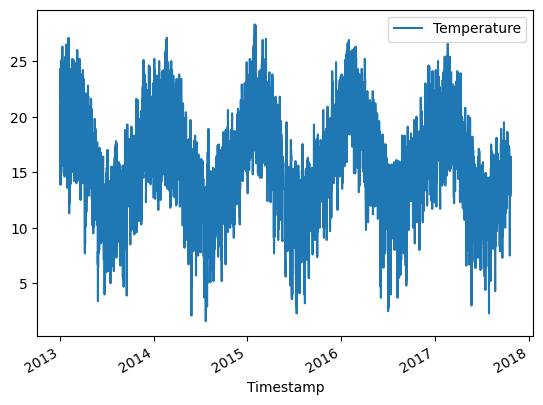

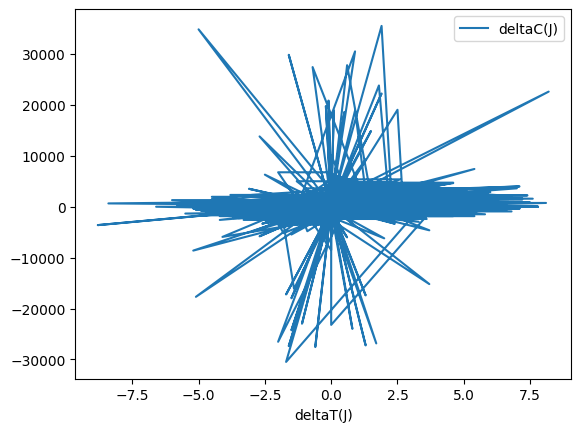

<Figure size 640x480 with 0 Axes>

In [256]:

import matplotlib.pyplot as plt

site_id = 6

weather = pd.read_csv(f"site_{site_id}_weather_post.csv", sep=";", parse_dates=['Timestamp'])
consumption = pd.read_csv(f"site_{site_id}_consumption_post.csv", sep=";", parse_dates=['Timestamp'])

print(consumption["Timestamp"])
consumption.plot(x="Timestamp", y=["Temperature"])
#consumption.plot(x="Temperature", y="Value")

consumption["C(J)"] = consumption["Value"]
consumption["C(J-1)"] = consumption["Value"].shift(periods=1)

consumption["T(J)"] = consumption["Temperature"]
consumption["T(J-1)"] = consumption["Temperature"].shift(periods=1)

consumption = consumption.drop([0])

consumption["deltaT(J)"] = consumption["T(J)"] - consumption["T(J-1)"] 
consumption["deltaC(J)"] = consumption["C(J)"] - consumption["C(J-1)"] 

figure2 = consumption.plot(x="deltaT(J)", y="deltaC(J)")
plt.figure().show() 

#weather = pandas.read_csv(f"site_{site_id}_weather.csv", sep=";", parse_dates=['Timestamp'])

print(consumption.head(100))
print(consumption["Temperature"].max())

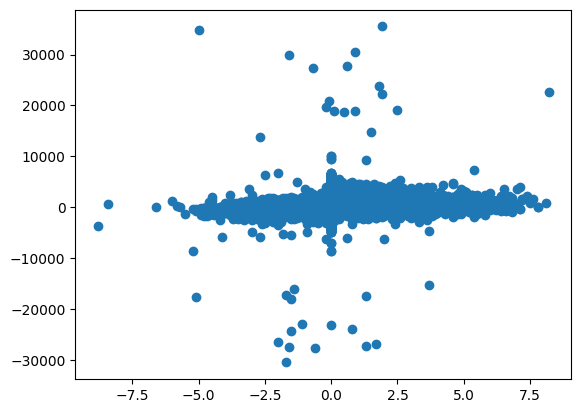

In [257]:
plt.scatter(x=consumption["deltaT(J)"], y=consumption["deltaC(J)"])


In [264]:
DataForRegression=consumption[["deltaT(J)","deltaC(J)"]]
DataForRegression['deltaC(J-1)']=DataForRegression['deltaC(J)'].shift(1)
DataForRegressionb=DataForRegression.dropna(axis=1)
DataForRegression.head(7)

C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\1954430087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForRegression['deltaC(J-1)']=DataForRegression['deltaC(J)'].shift(1)


deltaT(J)   deltaC(J)  deltaC(J-1)
1        0.0  -46.325412          NaN
2        0.0  -46.325412   -46.325412
3        0.0  -46.325412   -46.325412
4        0.0  -46.325412   -46.325412
5        0.0   69.488118   -46.325412
6        0.0   69.488118    69.488118
7        0.0  185.301648    69.488118

In [265]:
DataForRegression['deltaT(J-1)']=DataForRegression['deltaT(J)'].shift(1)
DataForRegressionb=DataForRegression.dropna(axis=1)

C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\1675726000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForRegression['deltaT(J-1)']=DataForRegression['deltaT(J)'].shift(1)


In [266]:
DataForRegression1=  DataForRegression.drop([1])

In [267]:
DataForRegression1

deltaT(J)   deltaC(J)  deltaC(J-1)  deltaT(J-1)
2             0.0  -46.325412   -46.325412          0.0
3             0.0  -46.325412   -46.325412          0.0
4             0.0  -46.325412   -46.325412          0.0
5             0.0   69.488118   -46.325412          0.0
6             0.0   69.488118    69.488118          0.0
...           ...         ...          ...          ...
140739        0.0    0.000000  -185.301648          0.0
140740        0.0    0.000000     0.000000          0.0
140741        0.0 -370.603296     0.000000          0.0
140742        0.0 -370.603296  -370.603296          0.0
140743        0.0  185.301648  -370.603296          0.0

[140742 rows x 4 columns]

In [268]:
DataForRegression1=DataForRegression1.dropna()

In [269]:
y=DataForRegression1["deltaC(J)"]

In [270]:
y

2         -46.325412
3         -46.325412
4         -46.325412
5          69.488118
6          69.488118
             ...    
140739      0.000000
140740      0.000000
140741   -370.603296
140742   -370.603296
140743    185.301648
Name: deltaC(J), Length: 139615, dtype: float64

In [271]:
x=DataForRegression1.drop(DataForRegression1.columns[[1]], axis=1)

In [272]:
x

deltaT(J)  deltaC(J-1)  deltaT(J-1)
2             0.0   -46.325412          0.0
3             0.0   -46.325412          0.0
4             0.0   -46.325412          0.0
5             0.0   -46.325412          0.0
6             0.0    69.488118          0.0
...           ...          ...          ...
140739        0.0  -185.301648          0.0
140740        0.0     0.000000          0.0
140741        0.0     0.000000          0.0
140742        0.0  -370.603296          0.0
140743        0.0  -370.603296          0.0

[139615 rows x 3 columns]

In [273]:
x[x.isna().any(axis=1)]

Empty DataFrame
Columns: [deltaT(J), deltaC(J-1), deltaT(J-1)]
Index: []

In [274]:
y[y.isna()]

Series([], Name: deltaC(J), dtype: float64)

In [275]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [276]:
regr = linear_model.LinearRegression(fit_intercept=False)

In [277]:
regr.fit(x, y)

LinearRegression(fit_intercept=False)

In [278]:
y_pred = regr.predict(x)

In [279]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficients: 
 [19.63788156  0.60809605 39.06437609]
Mean squared error: 519609.02
Coefficient of determination: 0.37


In [280]:
regr.intercept_


0.0

In [281]:
r2_score(y,y_pred)

0.3745178118185988

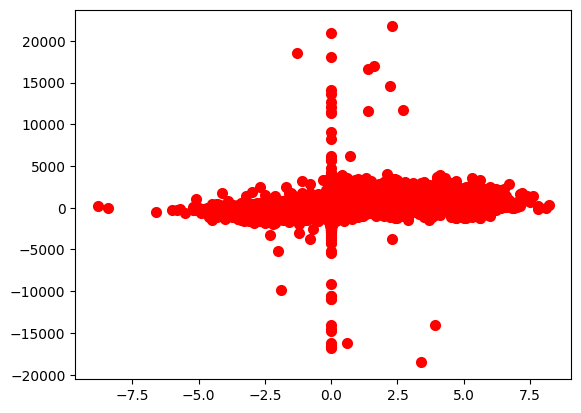

In [282]:
#plt.scatter(x, y,  color='gray')
plt.scatter(x['deltaT(J)'], y_pred, color='red', linewidth=2)
plt.show()

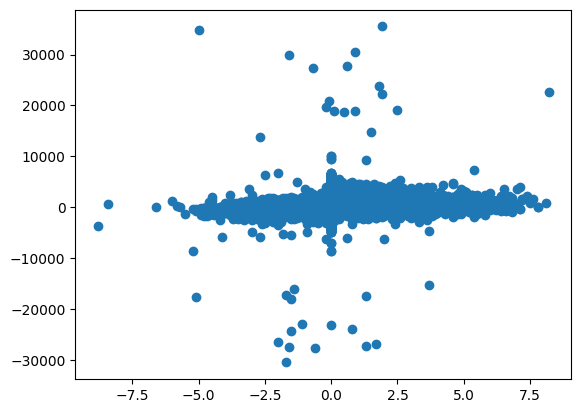

In [283]:
plt.scatter(x['deltaT(J)'], y)
plt.show()

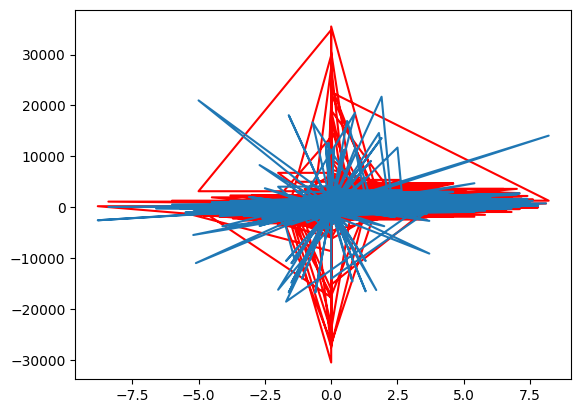

In [284]:
plt.plot(x['deltaT(J-1)'],y,'r', x['deltaT(J-1)'], y_pred)

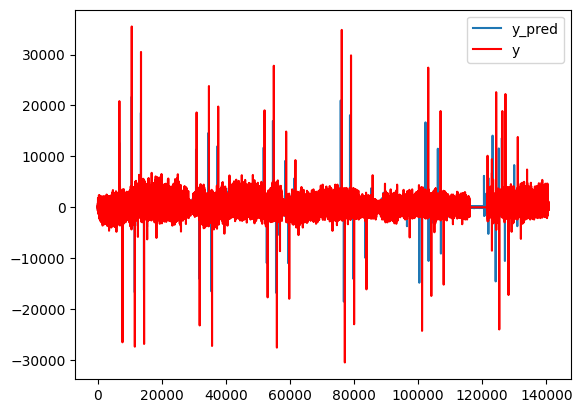

In [285]:
plt.plot(y_pred)
plt.plot(y,'r')
plt.legend(['y_pred', 'y'])

In [286]:
import numpy as np
DataafterRegression=pd.concat([x,pd.DataFrame(np.matrix.transpose(y_pred),columns=['DeltaC_pred'])], ignore_index=True, axis=1)

In [287]:
DataafterRegression=x

In [288]:
DataafterRegression["DeltaC_pred"]=np.matrix.transpose(y_pred)
DataafterRegression["DeltaC_pred"]=DataafterRegression["DeltaC_pred"].shift(-1)

In [289]:
DataafterRegression["DeltaC(J)"]=y

In [290]:
print(DataafterRegression)

        deltaT(J)  deltaC(J-1)  deltaT(J-1)  DeltaC_pred   DeltaC(J)
2             0.0   -46.325412          0.0    -28.17030  -46.325412
3             0.0   -46.325412          0.0    -28.17030  -46.325412
4             0.0   -46.325412          0.0    -28.17030  -46.325412
5             0.0   -46.325412          0.0     42.25545   69.488118
6             0.0    69.488118          0.0     42.25545   69.488118
...           ...          ...          ...          ...         ...
140739        0.0  -185.301648          0.0      0.00000    0.000000
140740        0.0     0.000000          0.0      0.00000    0.000000
140741        0.0     0.000000          0.0   -225.36240 -370.603296
140742        0.0  -370.603296          0.0   -225.36240 -370.603296
140743        0.0  -370.603296          0.0          NaN  185.301648

[139615 rows x 5 columns]


In [291]:
#DataafterRegression1=pd.concat(DataafterRegression)
#DataafterRegression1[~DataafterRegression1.index.duplicated()].sort_index()

In [292]:
DataafterRegression

deltaT(J)  deltaC(J-1)  deltaT(J-1)  DeltaC_pred   DeltaC(J)
2             0.0   -46.325412          0.0    -28.17030  -46.325412
3             0.0   -46.325412          0.0    -28.17030  -46.325412
4             0.0   -46.325412          0.0    -28.17030  -46.325412
5             0.0   -46.325412          0.0     42.25545   69.488118
6             0.0    69.488118          0.0     42.25545   69.488118
...           ...          ...          ...          ...         ...
140739        0.0  -185.301648          0.0      0.00000    0.000000
140740        0.0     0.000000          0.0      0.00000    0.000000
140741        0.0     0.000000          0.0   -225.36240 -370.603296
140742        0.0  -370.603296          0.0   -225.36240 -370.603296
140743        0.0  -370.603296          0.0          NaN  185.301648

[139615 rows x 5 columns]

In [293]:
DataafterRegression1=DataafterRegression.dropna()

In [294]:
DataafterRegression1

deltaT(J)  deltaC(J-1)  deltaT(J-1)  DeltaC_pred   DeltaC(J)
2             0.0   -46.325412          0.0    -28.17030  -46.325412
3             0.0   -46.325412          0.0    -28.17030  -46.325412
4             0.0   -46.325412          0.0    -28.17030  -46.325412
5             0.0   -46.325412          0.0     42.25545   69.488118
6             0.0    69.488118          0.0     42.25545   69.488118
...           ...          ...          ...          ...         ...
140738        0.0  -185.301648         -0.1   -112.68120 -185.301648
140739        0.0  -185.301648          0.0      0.00000    0.000000
140740        0.0     0.000000          0.0      0.00000    0.000000
140741        0.0     0.000000          0.0   -225.36240 -370.603296
140742        0.0  -370.603296          0.0   -225.36240 -370.603296

[139614 rows x 5 columns]

In [295]:
#consumption["deltaT(J)"] = consumption["T(J)"] - consumption["T(J-1)"] 
#consumption["deltaC(J)"] = consumption["C(J)"] - consumption["C(J-1)"] 
DataafterRegression1["T(J)"]=DataafterRegression1["deltaT(J)"]+consumption["T(J-1)"] 
DataafterRegression1["C_pred(J)"]=DataafterRegression1["DeltaC_pred"]+consumption["C(J-1)"]  
DataafterRegression1["C(J)"]=DataafterRegression1["DeltaC(J)"]+consumption["C(J-1)"] 

C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\841239687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataafterRegression1["T(J)"]=DataafterRegression1["deltaT(J)"]+consumption["T(J-1)"]
C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\841239687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataafterRegression1["C_pred(J)"]=DataafterRegression1["DeltaC_pred"]+consumption["C(J-1)"]
C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\841239687.py:5: SettingWithCopyWarning: 
A value 

In [296]:
DataafterRegression1

deltaT(J)  deltaC(J-1)  deltaT(J-1)  DeltaC_pred   DeltaC(J)  T(J)  \
2             0.0   -46.325412          0.0    -28.17030  -46.325412  21.7   
3             0.0   -46.325412          0.0    -28.17030  -46.325412  21.7   
4             0.0   -46.325412          0.0    -28.17030  -46.325412  21.7   
5             0.0   -46.325412          0.0     42.25545   69.488118  21.7   
6             0.0    69.488118          0.0     42.25545   69.488118  21.7   
...           ...          ...          ...          ...         ...   ...   
140738        0.0  -185.301648         -0.1   -112.68120 -185.301648  12.9   
140739        0.0  -185.301648          0.0      0.00000    0.000000  12.9   
140740        0.0     0.000000          0.0      0.00000    0.000000  12.9   
140741        0.0     0.000000          0.0   -225.36240 -370.603296  12.9   
140742        0.0  -370.603296          0.0   -225.36240 -370.603296  12.9   

           C_pred(J)          C(J)  
2       25033.877578  25015.722466  
3       24987.552166  24969.397055  
4       24941.226755  24923.071643  
5       24965.327093  24992.559760  
6       25034.815210  25062.047878  
...              ...           ...  
140738  16008.562167  15935.941719  
140739  15935.941719  15935.941719  
140740  15935.941719  15935.941719  
140741  15710.579319  15565.338424  
140742  15339.976024  15194.735128  

[139614 rows x 8 columns]

In [297]:
DataafterRegression1["Timestamp"]=consumption["Timestamp"]

C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\4000185491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataafterRegression1["Timestamp"]=consumption["Timestamp"]


In [298]:
DataafterRegression1

deltaT(J)  deltaC(J-1)  deltaT(J-1)  DeltaC_pred   DeltaC(J)  T(J)  \
2             0.0   -46.325412          0.0    -28.17030  -46.325412  21.7   
3             0.0   -46.325412          0.0    -28.17030  -46.325412  21.7   
4             0.0   -46.325412          0.0    -28.17030  -46.325412  21.7   
5             0.0   -46.325412          0.0     42.25545   69.488118  21.7   
6             0.0    69.488118          0.0     42.25545   69.488118  21.7   
...           ...          ...          ...          ...         ...   ...   
140738        0.0  -185.301648         -0.1   -112.68120 -185.301648  12.9   
140739        0.0  -185.301648          0.0      0.00000    0.000000  12.9   
140740        0.0     0.000000          0.0      0.00000    0.000000  12.9   
140741        0.0     0.000000          0.0   -225.36240 -370.603296  12.9   
140742        0.0  -370.603296          0.0   -225.36240 -370.603296  12.9   

           C_pred(J)          C(J)                 Timestamp  
2       25033.877578  25015.722466 2013-01-01 01:30:00+00:00  
3       24987.552166  24969.397055 2013-01-01 01:45:00+00:00  
4       24941.226755  24923.071643 2013-01-01 02:00:00+00:00  
5       24965.327093  24992.559760 2013-01-01 02:15:00+00:00  
6       25034.815210  25062.047878 2013-01-01 02:30:00+00:00  
...              ...           ...                       ...  
140738  16008.562167  15935.941719 2017-10-23 01:30:00+00:00  
140739  15935.941719  15935.941719 2017-10-23 01:45:00+00:00  
140740  15935.941719  15935.941719 2017-10-23 02:00:00+00:00  
140741  15710.579319  15565.338424 2017-10-23 02:15:00+00:00  
140742  15339.976024  15194.735128 2017-10-23 02:30:00+00:00  

[139614 rows x 9 columns]

In [299]:
#plt.plot(DataafterRegression1['T(J)'],DataafterRegression1['C(J)'])#,'r', x['deltaT(J-1)'], y_pred)

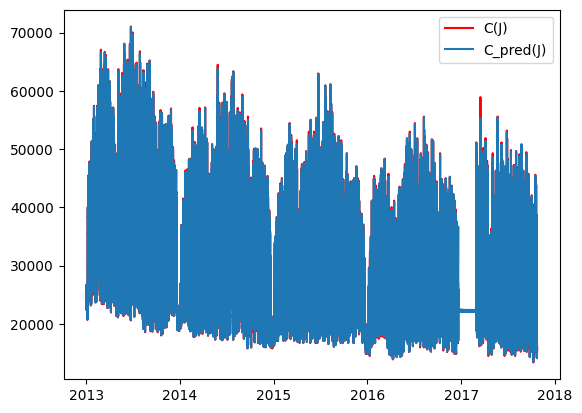

In [300]:
#DataafterRegression1.plot(x="Timestamp", y=["C(J)"])
#DataafterRegression1.plot(x="Timestamp", y=["C_pred(J)"])


plt.plot(DataafterRegression1["Timestamp"],DataafterRegression1["C(J)"],'r',DataafterRegression1["Timestamp"],DataafterRegression1["C_pred(J)"])
#plt.plot(y,'r')
plt.legend(['C(J)', 'C_pred(J)'])

In [301]:
mean_squared_error(y_true=DataafterRegression1["C(J)"],y_pred=DataafterRegression1["C_pred(J)"])

126194.47226763415

In [302]:
mean_absolute_error(y_true=DataafterRegression1["C(J)"],y_pred=DataafterRegression1["C_pred(J)"])

202.81542538599072

In [303]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=DataafterRegression1["C(J)"],y_pred=DataafterRegression1["C_pred(J)"])

0.6936105037179624

In [306]:
consumption1 =pd.read_csv("power-laws-forecasting-energy-consumption-test-data.csv", sep=";", parse_dates=['Timestamp'])

site_id = 6

consumption_on_site = consumption[consumption["SiteId"] == site_id]
consumption_on_site = consumption_on_site.sort_values("Timestamp")

consumption_on_site.to_csv(f"site_{site_id}_consumption1.csv", sep=";", index=False)

PermissionError: [Errno 13] Permission denied: 'site_6_consumption1.csv'

In [310]:

import datetime

site_id = 6

consumption1 = pd.read_csv(f"site_{site_id}_consumption1.csv", sep=";", parse_dates=['Timestamp'])

def datetime_to_epoch(d1):
    """
    January 1st, 1970 at 00:00:00 UTC is referred to as the Unix epoch
    :param d1: input date
    :return: seconds since unix epoch
    """
    if not d1.tzinfo:
        raise ValueError("date is missing timezone information")

    d2 = datetime.datetime(1970, 1, 1, tzinfo=datetime.timezone.utc)
    time_delta = d1 - d2
    ts = int(time_delta.total_seconds())
    return ts

def to_unix_epoch(row):
    return datetime_to_epoch(row["Timestamp"])

weather = weather[weather["Distance"] < 8]

weather["UnixTS"] = weather.apply(to_unix_epoch, axis=1)
consumption1["UnixTS"] = consumption1.apply(to_unix_epoch, axis=1)

def find_closest_temperature_at_ts(row):
    timestamp = row["UnixTS"]
    loc = weather["UnixTS"].searchsorted(timestamp)
    if loc < len(weather)-1:
        c0 = weather.iloc[ loc ]
        c1 = weather.iloc[ loc+1 ]
        distance = c1["UnixTS"] - c0["UnixTS"]
        print("YO... ", distance)
        alpha = (timestamp - c0["UnixTS"]) / distance
        t0 = weather.iloc[loc]["Temperature"]
        t1 = weather.iloc[loc+1]["Temperature"]
        return (1-alpha) * t0 + alpha * t1
    
    return weather.iloc[loc]["Temperature"]

consumption1["Temperature"] = consumption1.apply(find_closest_temperature_at_ts, axis=1)
print(consumption1.head(50))

YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800
YO...  10800

In [311]:
consumption1

obs_id  SiteId                 Timestamp  ForecastId         Value  \
0       1855136       6 2013-01-01 01:15:00+00:00          43  25062.047878   
1       5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
2       1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
3        167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
4       1417840       6 2013-01-01 02:15:00+00:00          43  24992.559760   
...         ...     ...                       ...         ...           ...   
140738  2522602       6 2017-10-23 01:45:00+00:00         188  15935.941719   
140739  7671789       6 2017-10-23 02:00:00+00:00         188  15935.941719   
140740   184978       6 2017-10-23 02:15:00+00:00         188  15565.338424   
140741  1399957       6 2017-10-23 02:30:00+00:00         188  15194.735128   
140742  4821512       6 2017-10-23 02:45:00+00:00         188  15380.036776   

            UnixTS  Temperature          C(J)        C(J-1)  T(J)  T(J-1)  \
0       1357002900    18.958333  25062.047878  25108.373290  21.7    21.7   
1       1357003800    19.016667  25015.722466  25062.047878  21.7    21.7   
2       1357004700    19.075000  24969.397055  25015.722466  21.7    21.7   
3       1357005600    19.133333  24923.071643  24969.397055  21.7    21.7   
4       1357006500    19.191667  24992.559760  24923.071643  21.7    21.7   
...            ...          ...           ...           ...   ...     ...   
140738  1508723100    12.900000  15935.941719  15935.941719  12.9    12.9   
140739  1508724000    12.900000  15935.941719  15935.941719  12.9    12.9   
140740  1508724900    12.900000  15565.338424  15935.941719  12.9    12.9   
140741  1508725800    12.900000  15194.735128  15565.338424  12.9    12.9   
140742  1508726700    12.900000  15380.036776  15194.735128  12.9    12.9   

        deltaT(J)   deltaC(J)  
0             0.0  -46.325412  
1             0.0  -46.325412  
2             0.0  -46.325412  
3             0.0  -46.325412  
4             0.0   69.488118  
...           ...         ...  
140738        0.0    0.000000  
140739        0.0    0.000000  
140740        0.0 -370.603296  
140741        0.0 -370.603296  
140742        0.0  185.301648  

[140743 rows x 13 columns]

In [312]:
import pandas
import datetime

site_id = 6

weather = pandas.read_csv(f"site_{site_id}_weather.csv", sep=";", parse_dates=['Timestamp'])
consumption1 = pandas.read_csv(f"site_{site_id}_consumption1.csv", sep=";", parse_dates=['Timestamp'])

def datetime_to_epoch(d1):
    """
    January 1st, 1970 at 00:00:00 UTC is referred to as the Unix epoch
    :param d1: input date
    :return: seconds since unix epoch
    """
    if not d1.tzinfo:
        raise ValueError("date is missing timezone information")

    d2 = datetime.datetime(1970, 1, 1, tzinfo=datetime.timezone.utc)
    time_delta = d1 - d2
    ts = int(time_delta.total_seconds())
    return ts

def to_unix_epoch(row):
    return datetime_to_epoch(row["Timestamp"])

weather = weather[weather["Distance"] < 8]

weather["UnixTS"] = weather.apply(to_unix_epoch, axis=1)
consumption1["UnixTS"] = consumption1.apply(to_unix_epoch, axis=1)

def convert_to_celisus(f):
    return (f - 32) / 1.8

def find_closest_temperature_at_ts(row):
    timestamp = row["UnixTS"]
    loc = weather["UnixTS"].searchsorted(timestamp)
    
    return weather.iloc[loc]["Temperature"]


    if loc < len(weather)-1:
        c0 = weather.iloc[ loc ]
        c1 = weather.iloc[ loc+1 ]
        distance = c1["UnixTS"] - c0["UnixTS"]
        alpha = (timestamp - c0["UnixTS"]) / distance
        t0 = weather.iloc[loc]["Temperature"]
        t1 = weather.iloc[loc+1]["Temperature"]
        return convert_to_celisus((1-alpha) * t0 + alpha * t1)
    
    return convert_to_celisus(weather.iloc[loc]["Temperature"])

consumption1["Temperature"] = consumption1.apply(find_closest_temperature_at_ts, axis=1)

weather.to_csv(f"site_{site_id}_weather_post.csv", sep=";", index=False)
consumption1.to_csv(f"site_{site_id}_consumption_post1.csv", sep=";", index=False)

0        2013-01-01 01:15:00+00:00
1        2013-01-01 01:30:00+00:00
2        2013-01-01 01:45:00+00:00
3        2013-01-01 02:00:00+00:00
4        2013-01-01 02:15:00+00:00
                    ...           
140738   2017-10-23 01:45:00+00:00
140739   2017-10-23 02:00:00+00:00
140740   2017-10-23 02:15:00+00:00
140741   2017-10-23 02:30:00+00:00
140742   2017-10-23 02:45:00+00:00
Name: Timestamp, Length: 140743, dtype: datetime64[ns, UTC]


C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\1222208182.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.figure().show()


      obs_id  SiteId                 Timestamp  ForecastId         Value  \
1    5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
2    1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
3     167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
4    1417840       6 2013-01-01 02:15:00+00:00          43  24992.559760   
5    6647355       6 2013-01-01 02:30:00+00:00          43  25062.047878   
..       ...     ...                       ...         ...           ...   
96   7679920       6 2013-01-02 01:15:00+00:00          43  24946.234349   
97   3636173       6 2013-01-02 01:30:00+00:00          43  24691.444583   
98   2507416       6 2013-01-02 01:45:00+00:00          43  24784.095407   
99   4975213       6 2013-01-02 02:00:00+00:00          43  24876.746231   
100   194561       6 2013-01-02 02:15:00+00:00          43  25154.698702   

         UnixTS  Temperature          C(J)        C(J-1)  T(J)  T(J-1)  \
1    13570038

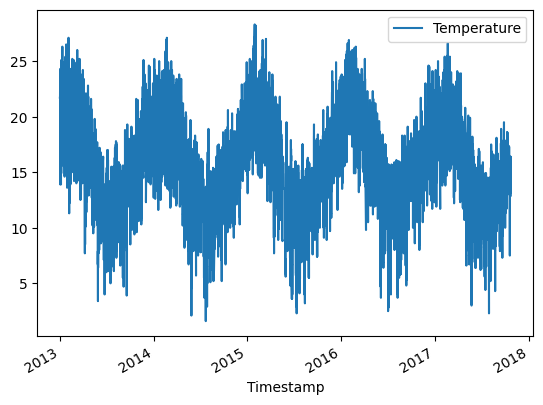

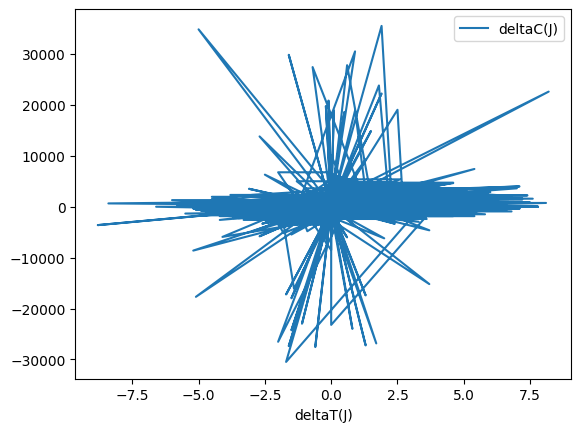

<Figure size 640x480 with 0 Axes>

In [313]:
import matplotlib.pyplot as plt

site_id = 6

weather = pd.read_csv(f"site_{site_id}_weather_post.csv", sep=";", parse_dates=['Timestamp'])
consumption1 = pd.read_csv(f"site_{site_id}_consumption_post1.csv", sep=";", parse_dates=['Timestamp'])

print(consumption1["Timestamp"])
consumption.plot(x="Timestamp", y=["Temperature"])
#consumption.plot(x="Temperature", y="Value")

consumption1["C(J)"] = consumption1["Value"]
consumption1["C(J-1)"] = consumption1["Value"].shift(periods=1)

consumption1["T(J)"] = consumption1["Temperature"]
consumption1["T(J-1)"] = consumption1["Temperature"].shift(periods=1)

consumption1 = consumption1.drop([0])

consumption1["deltaT(J)"] = consumption1["T(J)"] - consumption1["T(J-1)"] 
consumption1["deltaC(J)"] = consumption1["C(J)"] - consumption1["C(J-1)"] 

figure2 = consumption1.plot(x="deltaT(J)", y="deltaC(J)")
plt.figure().show() 

#weather = pandas.read_csv(f"site_{site_id}_weather.csv", sep=";", parse_dates=['Timestamp'])

print(consumption1.head(100))
print(consumption1["Temperature"].max())

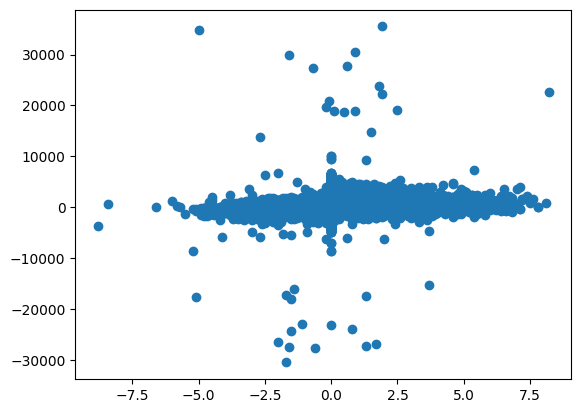

In [314]:
plt.scatter(x=consumption1["deltaT(J)"], y=consumption1["deltaC(J)"])

In [316]:
DataForRegression_test=consumption1[["deltaT(J)","deltaC(J)"]]
DataForRegression_test['deltaC(J-1)']=DataForRegression_test['deltaC(J)'].shift(1)
DataForRegressionb_test=DataForRegression_test.dropna(axis=1)
DataForRegression_test.head(7)

C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\2011820749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForRegression_test['deltaC(J-1)']=DataForRegression_test['deltaC(J)'].shift(1)


deltaT(J)   deltaC(J)  deltaC(J-1)
1        0.0  -46.325412          NaN
2        0.0  -46.325412   -46.325412
3        0.0  -46.325412   -46.325412
4        0.0   69.488118   -46.325412
5        0.0   69.488118    69.488118
6        0.0  185.301648    69.488118
7        0.0  185.301648   185.301648

In [317]:
DataForRegression_test['deltaT(J-1)']=DataForRegression_test['deltaT(J)'].shift(1)
DataForRegressionb_tes=DataForRegression_test.dropna(axis=1)

C:\Users\aqib.khan\AppData\Local\Temp\ipykernel_17716\3344653511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForRegression_test['deltaT(J-1)']=DataForRegression_test['deltaT(J)'].shift(1)


In [318]:
DataForRegression1_test=  DataForRegression_test.drop([1])

In [319]:
DataForRegression1_test

deltaT(J)   deltaC(J)  deltaC(J-1)  deltaT(J-1)
2             0.0  -46.325412   -46.325412          0.0
3             0.0  -46.325412   -46.325412          0.0
4             0.0   69.488118   -46.325412          0.0
5             0.0   69.488118    69.488118          0.0
6             0.0  185.301648    69.488118          0.0
...           ...         ...          ...          ...
140738        0.0    0.000000  -185.301648          0.0
140739        0.0    0.000000     0.000000          0.0
140740        0.0 -370.603296     0.000000          0.0
140741        0.0 -370.603296  -370.603296          0.0
140742        0.0  185.301648  -370.603296          0.0

[140741 rows x 4 columns]

In [321]:
DataForRegression1_test=DataForRegression1_test.dropna()

In [322]:
y_test=DataForRegression1_test["deltaC(J)"]

In [323]:
y_test

2         -46.325412
3         -46.325412
4          69.488118
5          69.488118
6         185.301648
             ...    
140738      0.000000
140739      0.000000
140740   -370.603296
140741   -370.603296
140742    185.301648
Name: deltaC(J), Length: 139614, dtype: float64

In [324]:
x_test=DataForRegression1_test.drop(DataForRegression1_test.columns[[1]], axis=1)

In [325]:
x_test

deltaT(J)  deltaC(J-1)  deltaT(J-1)
2             0.0   -46.325412          0.0
3             0.0   -46.325412          0.0
4             0.0   -46.325412          0.0
5             0.0    69.488118          0.0
6             0.0    69.488118          0.0
...           ...          ...          ...
140738        0.0  -185.301648          0.0
140739        0.0     0.000000          0.0
140740        0.0     0.000000          0.0
140741        0.0  -370.603296          0.0
140742        0.0  -370.603296          0.0

[139614 rows x 3 columns]

In [326]:
x_test[x_test.isna().any(axis=1)]

Empty DataFrame
Columns: [deltaT(J), deltaC(J-1), deltaT(J-1)]
Index: []

In [327]:
y_test[y_test.isna()]

Series([], Name: deltaC(J), dtype: float64)

In [328]:
y_pred = regr.predict(x_test)

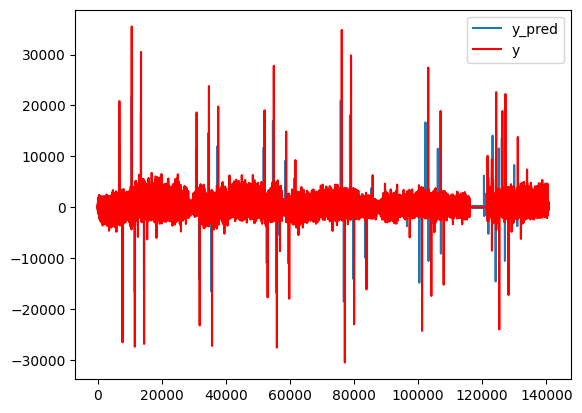

In [329]:
plt.plot(y_pred)
plt.plot(y,'r')
plt.legend(['y_pred', 'y'])

In [331]:
import numpy as np
DataafterRegression_test=pd.concat([x,pd.DataFrame(np.matrix.transpose(y_pred),columns=['DeltaC_pred_test'])], ignore_index=True, axis=1)

DataafterRegression_test=x_test

DataafterRegression_test["DeltaC_pred_test"]=np.matrix.transpose(y_pred)
DataafterRegression_test["DeltaC_pred_test"]=DataafterRegression_test["DeltaC_pred_test"].shift(-1)

DataafterRegression_test["DeltaC(J)"]=y

print(DataafterRegression_test)

DataafterRegression_test

DataafterRegression1_test=DataafterRegression_test.dropna()

DataafterRegression1_test

        deltaT(J)  deltaC(J-1)  deltaT(J-1)  DeltaC_pred_test   DeltaC(J)
2             0.0   -46.325412          0.0         -28.17030  -46.325412
3             0.0   -46.325412          0.0         -28.17030  -46.325412
4             0.0   -46.325412          0.0          42.25545  -46.325412
5             0.0    69.488118          0.0          42.25545   69.488118
6             0.0    69.488118          0.0         112.68120   69.488118
...           ...          ...          ...               ...         ...
140738        0.0  -185.301648          0.0           0.00000 -185.301648
140739        0.0     0.000000          0.0           0.00000    0.000000
140740        0.0     0.000000          0.0        -225.36240    0.000000
140741        0.0  -370.603296          0.0        -225.36240 -370.603296
140742        0.0  -370.603296          0.0               NaN -370.603296

[139614 rows x 5 columns]


deltaT(J)  deltaC(J-1)  deltaT(J-1)  DeltaC_pred_test   DeltaC(J)
2             0.0   -46.325412          0.0         -28.17030  -46.325412
3             0.0   -46.325412          0.0         -28.17030  -46.325412
4             0.0   -46.325412          0.0          42.25545  -46.325412
5             0.0    69.488118          0.0          42.25545   69.488118
6             0.0    69.488118          0.0         112.68120   69.488118
...           ...          ...          ...               ...         ...
140737        0.0  -185.301648         -0.1        -112.68120 -185.301648
140738        0.0  -185.301648          0.0           0.00000 -185.301648
140739        0.0     0.000000          0.0           0.00000    0.000000
140740        0.0     0.000000          0.0        -225.36240    0.000000
140741        0.0  -370.603296          0.0        -225.36240 -370.603296

[139565 rows x 5 columns]